<a href="https://colab.research.google.com/github/MaxKuzaj13/dw_matrix_time_series/blob/master/matrix_5_day_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import fbprophet
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error as mea

In [3]:
# should be '0.6'
fbprophet.__version__


'0.6'

In [4]:
# should be '2.19.1.1'
pystan.__version__

'2.19.1.1'

In [0]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/airmiles.csv'
#or https://drive.google.com/open?id=181fmoHLosOYRbNG6NlxMoq535_Q-W3eT
df = pd.read_csv(path)

In [53]:
df.head()

,time,airmiles
0,1937,412
1,1938,480
2,1939,683
3,1940,1052
4,1941,1385


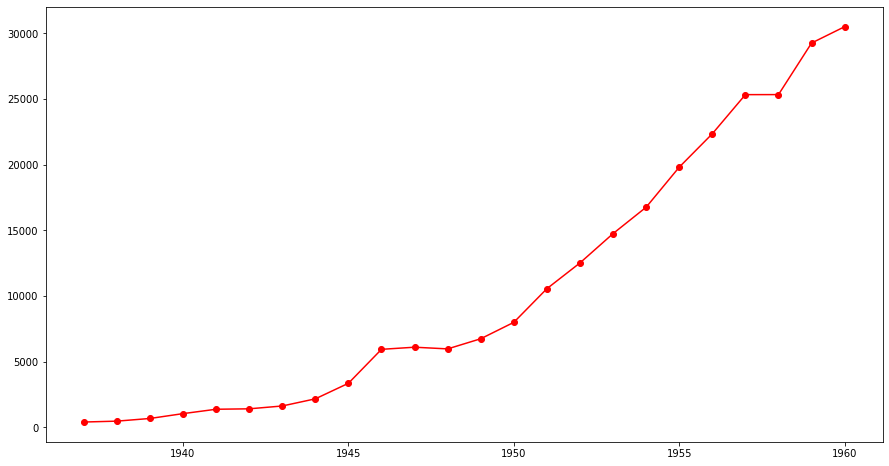

In [40]:
plt.figure(figsize=(15,8))
plt.plot(df.time, df.airmiles, 'o-', c = 'red');

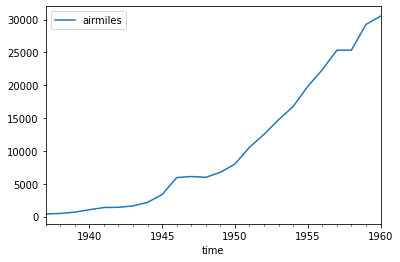

In [59]:
df = pd.read_csv(path, parse_dates=['time'], index_col='time')
df[['airmiles']].plot();

In [60]:
df.head()

,airmiles
time,
1937-01-01,412
1938-01-01,480
1939-01-01,683
1940-01-01,1052
1941-01-01,1385


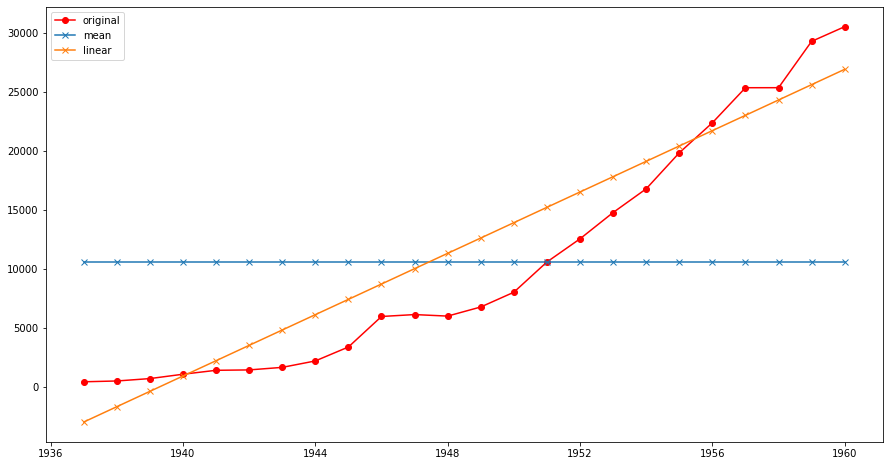

In [72]:
def linear_func(airmiles, k =None, b =0):
  mean_value = np.mean(df.airmiles)
  if k is None:
    return [mean_value] * len(airmiles)
  return [idx*k+b for idx, _ in enumerate(airmiles)]

plt.figure(figsize=(15,8))
plt.plot(df.index, df.airmiles, 'o-', c = 'red', label='original');
plt.plot(df.index, linear_func(df.airmiles), 'x-', label='mean');
plt.plot(df.index, linear_func(df.airmiles, k=1300, b =-3000), 'x-', label='linear');

plt.legend();

Metrics

In [76]:
print('mean', mea(df.airmiles, linear_func(df.airmiles)))
print('liner', mea(df.airmiles, linear_func(df.airmiles, k=1300, b =-3000)))


mean 8499.305555555557
liner 2935.0833333333335
